# Artificial Neural Network for Multi-class 2D Classification

In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

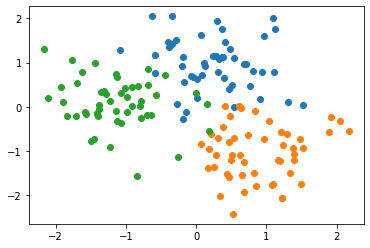

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=3, n_features=2, random_state=0)
X = StandardScaler().fit_transform(X)
for i in range(3):
    plt.scatter(X[y == i,0],X[y == i,1])
plt.show()

## Create Multi-class Classifier MLP class

In [3]:
class MulticlassMLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer and output layer
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def softmax(self, x):
        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def softmax_derivative(self, x):
        return x * (1 - x)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward propagation
        self.hidden_input = np.dot(inputs, self.weights_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_layer_input = np.dot(self.hidden_output, self.weights_output) + self.bias_output
        self.output = self.softmax(self.output_layer_input)
        return self.output

    def backward(self, inputs, targets, learning_rate):
        batch_loss = 0
        
        for i in range(len(inputs)):
            # One-hot encode the target class
            input_data = np.array([inputs[i,:]])
            target_data = np.zeros((1,np.max(targets)+1))
            target_data[0,targets[i]] = 1
            
            # Forward pass
            self.forward(input_data)
            
            # Backward pass
            output_error = self.output - target_data
            hidden_error = output_error.dot(self.weights_output.T) * self.softmax_derivative(self.hidden_output)

            # Update weights and biases using gradient descent
            self.weights_output -= learning_rate * self.hidden_output.T.dot(output_error)
            self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            self.weights_hidden -= learning_rate * input_data.T.dot(hidden_error)
            self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)
            
            # Add to the batch loss function
            batch_loss += self.cross_entropy_loss(target_data, self.output)
        
        return batch_loss / len(inputs)

    def plot_decision(self, X, y):
        nx, ny = 80, 80
        xv, yv = np.meshgrid(np.linspace(-3,3,nx), 
                             np.linspace(-3,3,ny))

        xv, yv = xv.reshape(-1,1), yv.reshape(-1,1)
        grid = np.hstack((xv,yv))
        zv = np.zeros(grid.shape[0])
        color = ['C0','C1','C2']
        for i in range(grid.shape[0]):
            zv[i] = mlp.predict(grid[i,:])
        for i in range(3):
            plt.scatter(xv[zv == i],yv[zv == i], color=color[i], alpha=0.2, s=4)
            plt.scatter(X[y == i,0],X[y == i,1], color=color[i], edgecolor='k')
        plt.show()
    
    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            # Backpropagation algorithm
            batch_loss = self.backward(inputs, targets, learning_rate)

            # Print the loss for every 1000 epochs
            if (epoch+1) % 100 == 0 or epoch == 0:
                print(f'Epoch {epoch+1}, Training Loss: {batch_loss}')
                self.plot_decision(inputs, targets)

    def cross_entropy_loss(self, y_true, y_pred):
        # Compute cross-entropy loss
        loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / len(y_true)
        return loss

    def predict(self, inputs):
        # Make predictions using the trained model
        return np.argmax(self.forward(inputs), axis=1)

Epoch 1, Training Loss: 1.9203301622960518


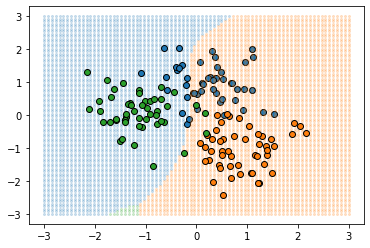

Epoch 100, Training Loss: 0.17285313795048854


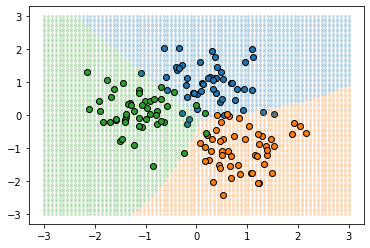

Epoch 200, Training Loss: 0.1621230389641993


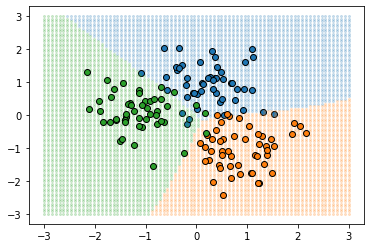

Epoch 300, Training Loss: 0.15360051091346386


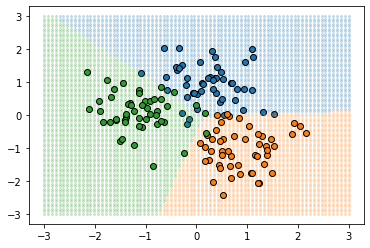

Epoch 400, Training Loss: 0.1458238170855058


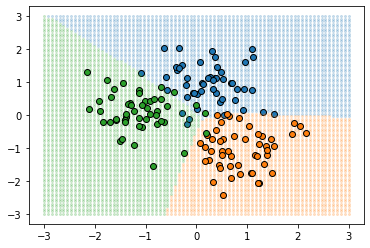

Epoch 500, Training Loss: 0.13913336048591865


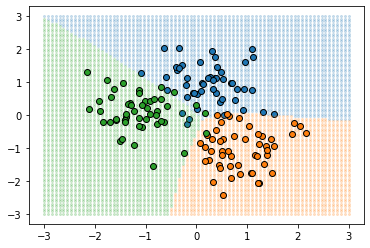

Epoch 600, Training Loss: 0.13355870928949654


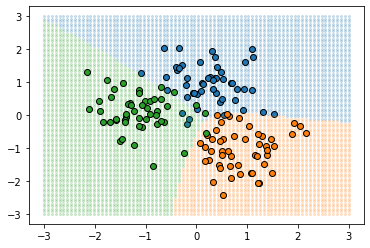

Epoch 700, Training Loss: 0.12887259967439504


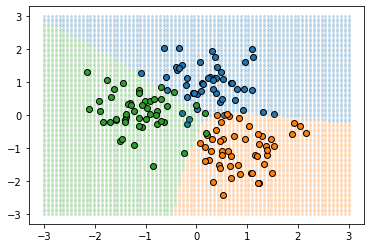

Epoch 800, Training Loss: 0.12486779589564435


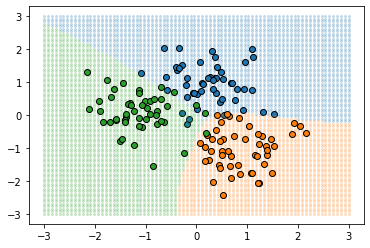

Epoch 900, Training Loss: 0.12138534195586784


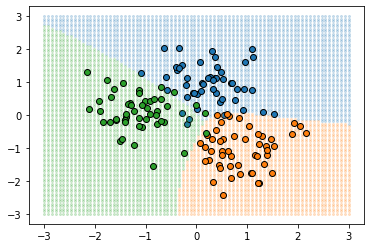

Epoch 1000, Training Loss: 0.11830088566957218


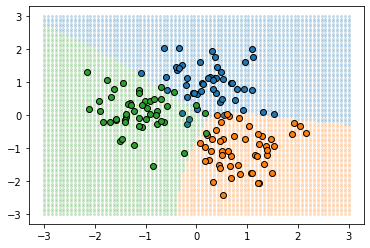

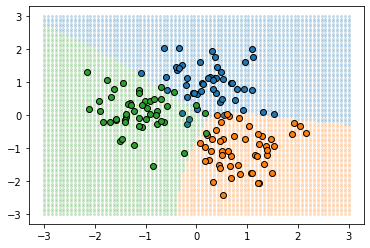

In [4]:
# Define your input, target, and parameters
input_size = 2
hidden_size = 10
output_size = 3
learning_rate = 0.01
epochs = 1000

# Create an instance of BinaryClassifierMLP
mlp = MulticlassMLP(input_size, hidden_size, output_size)

# Train the binary classifier
mlp.train(X, y, epochs, learning_rate)

mlp.plot_decision(X, y)

## Model performance on Training Data

In [17]:
y_pred = np.zeros(y.shape)
conf_matrix = np.zeros((np.max(y)+1,np.max(y)+1))
for i in range(len(y)):
    y_pred[i] = mlp.predict(X[i,:])
    conf_matrix[int(y_pred[i]),int(y[i])] += 1

print("Confusion Matrix (Predicted vs. Actual)")
print(conf_matrix)

acc = np.trace(conf_matrix)/len(X)
print(f'Accuracy: {acc}')

Confusion Matrix (Predicted vs. Actual)
[[46.  0.  4.]
 [ 1. 50.  1.]
 [ 3.  0. 45.]]
Accuracy: 0.94
